In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import linregress
import seaborn as sns

In light of what looks to be - finally - the year when central banks around the world start, albeit slowly, to reduce the sizes of their respective balance sheets, I have given a shot at somehow quantifying the impact of this reduction, while also isolating it from the short term rates expectations over time.

In order to do so, I have constructed and calibrated for a number of yield curves around the world an affine Interest Rate Model (multiple approaches exist in the literature, with obviously at times different results!) and tried to isolate the impact of the Quantitative Easing programmes in terms of ... the yields' term premiums: the excess return that an investor requires during N years over and above the average rolling short term risk free rate over the same N year period.

As other studies have noted, generally the term premium has been decreasing at a faster pace since 2008, with the start of the QE programmes (albeit with at times significant ups and downs along the way). The term premium, as expected, is still larger for longer maturities.

The chart below shows the 2y and the 10y term premiums for a number of markets (3M rolling averages), implied from zero rates backsolved from the swap curve (this approach is different than the one used in other studies, especially for Europe). Notably, the term premium for 2y rates remains reasonably well anchored (also thanks to the forward guidance from many central banks).
Term premiums across geographies look also quite correlated.

<IPython.core.display.Javascript object>


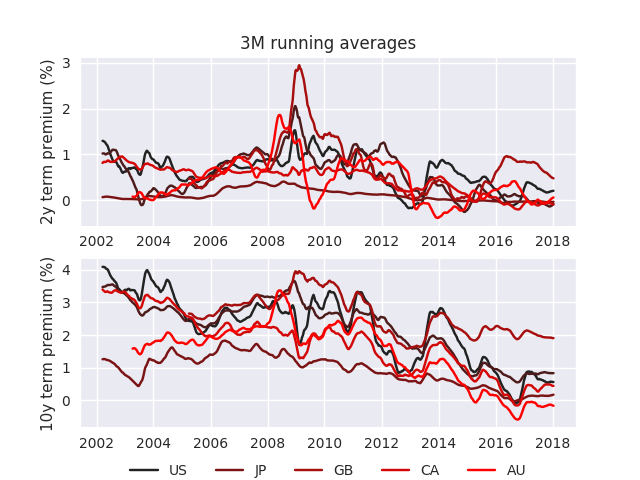

In [2]:
#importing data from files
tp10y = pd.read_pickle('tp10y.dat')
tp2y = pd.read_pickle('tp2y.dat')
tp10y_1qtr = tp10y.rolling(12).mean()
tp2y_1qtr = tp2y.rolling(12).mean()
sns.set()
sns.set_palette(sns.dark_palette('red'))
fig,ax = plt.subplots(2,1)
plt.sca(ax[0])
plt.title('3M running averages')
plt.ylabel('2y term premium (%)')
tp2y_1qtr.plot(ax=ax[0])
ax[0].legend_.remove()
plt.sca(ax[1])
plt.ylabel('10y term premium (%)')
tp10y_1qtr.plot(ax=ax[1])
ax[1].legend(loc='lower center', bbox_to_anchor=(0.5, -0.5),fancybox=True,shadow=True, ncol=5);
plt.show()

I have therefore regressed these term premiums with the log of the total balance sheets nominal size in USD (as the CB's impact on yields for the same purchased notional is logarithmic on yields).
...So one can at least work out - all else being equal - the relationship between the two variables and envisage where this is heading.
Note that the sizes of the balance sheets and the respective log values (of the cumulative sum, to keep into account spillover effects across markets) is also shown in the second picture that follows.

<IPython.core.display.Javascript object>


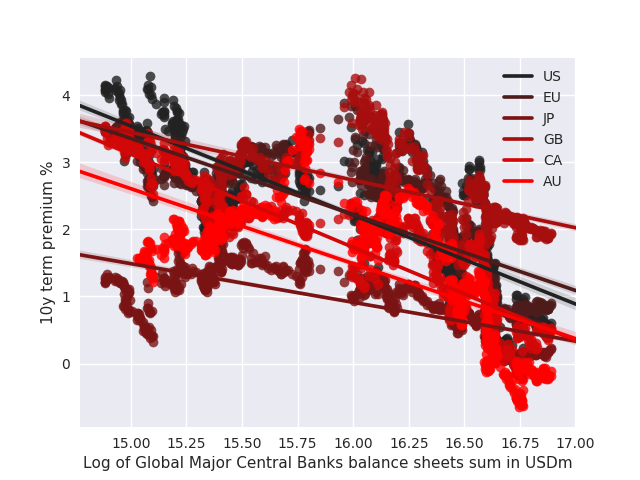

In [3]:
allcbbslog = pd.read_pickle('allcbbslog.dat')
allcbbs = pd.read_pickle('allcbbs.dat')
uscbbs = pd.read_pickle('uscbbs.dat')
eucbbs_usd = pd.read_pickle('eucbbs_usd.dat')
jpcbbs_usd = pd.read_pickle('jpcbbs_usd.dat')
gbcbbs_usd = pd.read_pickle('gbcbbs_usd.dat')
cncbbs_usd = pd.read_pickle('cncbbs_usd.dat')
fig,ax = plt.subplots(1,1)
sns.regplot(allcbbslog, tp10y['US'])
sns.regplot(allcbbslog, tp10y['EU'])
sns.regplot(allcbbslog, tp10y['JP'])
sns.regplot(allcbbslog, tp10y['GB'])
sns.regplot(allcbbslog, tp10y['CA'])
sns.regplot(allcbbslog, tp10y['AU'])
plt.ylabel('10y term premium %')
plt.xlabel('Log of Global Major Central Banks balance sheets sum in USDm')
plt.legend(['US','EU','JP','GB','CA','AU']);
plt.show()

<IPython.core.display.Javascript object>


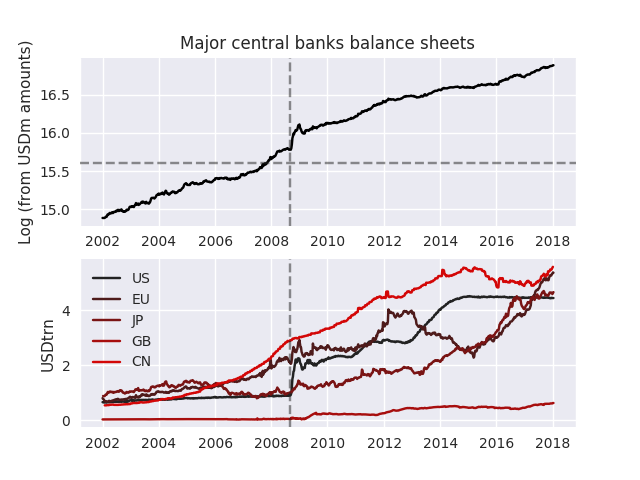

In [5]:
fig, ax = plt.subplots(2,1)
plt.sca(ax[0])
plt.title('Major central banks balance sheets')
allcbbslog.plot(color='k',grid=True, ax=ax[0])
plt.axvline('2008-09-01', linestyle='--', alpha=0.5)
plt.axhline(15.6, linestyle='--', alpha=0.5)
plt.ylabel('Log (from USDm amounts)')
plt.sca(ax[1])
(uscbbs/1e6).plot()
(eucbbs_usd/1e6).plot()
(jpcbbs_usd/1e6).plot()
(gbcbbs_usd/1e6).plot()
(cncbbs_usd/1e6).plot()
plt.axvline('2008-09-01', linestyle='--', alpha = 0.5)
plt.ylabel('USDtrn')
plt.legend(['US','EU','JP','GB','CN']);
plt.show()

From the charts above, it looks to me that the term premiums remained reasonably well behaved over the last year or so, and in addition, any <i>gentle</i> unwind of the balance sheets by central banks this year and next will not do  much to "trace back the route along the black line" of the total balance sheets worldwide. Progressively, if and when the unwind will increase pace and/or terminate in full, the term premium may increase even substantially... but not so much while the stock lasts. Mr Draghi stated again that the ECB sees the stock effect as the dominant one rather than the flow effect.

For example, regressing the 10y USD term premium over the global balance sheet log size will give an idea of the sensitivity of the term premium component of the 10y US yield to global central banks balance sheets. Then one can add their own expectations of short term average rate between now and 10y (easier said than done I know...) and get a "fair value view" of the 10y rate:

In [5]:
cntry = ['US','EU','JP','GB','AU','CA']
results = ['slope', 'R2', 'p-stat','stderr']
period = ['Since 2002','Since 2008','Since 2013']
iterables = [period, results]
cols = pd.MultiIndex.from_product(iterables, names = ['Period', 'Stat'])
stats = pd.DataFrame(index = cntry, columns=cols)
for c in cntry:
    tmp = pd.concat([allcbbslog, tp10y[c]], axis=1)
    tmp_exna = tmp.dropna()
    
    val1 = tmp_exna.values
    slope,intercept,r,p,stderr = linregress(val1[:,0],val1[:,1])
    stats[period[0],'slope'].loc[c] = slope
    stats[period[0],'R2'].loc[c] = r**2
    stats[period[0],'p-stat'].loc[c] = p
    stats[period[0],'stderr'].loc[c] = stderr
    
    val2 = tmp_exna.loc['2008-09-01':].values
    slope,intercept,r,p,stderr = linregress(val2[:,0],val2[:,1])
    stats[period[1],'slope'].loc[c] = slope
    stats[period[1],'R2'].loc[c] = r**2
    stats[period[1],'p-stat'].loc[c] = p
    stats[period[1],'stderr'].loc[c] = stderr
    
    val2 = tmp_exna.loc['2013-01-01':].values
    slope,intercept,r,p,stderr = linregress(val2[:,0],val2[:,1])
    stats[period[2],'slope'].loc[c] = slope
    stats[period[2],'R2'].loc[c] = r**2
    stats[period[2],'p-stat'].loc[c] = p
    stats[period[2],'stderr'].loc[c] = stderr
    
stats

Period Since 2002                                    Since 2008            \
Stat        slope        R2        p-stat     stderr      slope        R2   
US       -1.32533  0.594561  7.28723e-166  0.0378743   -2.95077  0.562651   
EU        -1.1322  0.626422  1.02672e-180  0.0302577   -3.06717  0.849794   
JP      -0.576596  0.526821  7.99435e-138  0.0189108   -1.44863  0.882088   
GB      -0.710196  0.309221   2.27062e-56  0.0407961    -2.2205  0.663914   
AU       -1.11695  0.448625  6.21579e-103  0.0443371   -3.41618  0.804647   
CA       -1.38758  0.833135             0  0.0214901   -2.10044  0.654322   

Period                          Since 2013                                     
Stat          p-stat     stderr      slope         R2       p-stat     stderr  
US       1.67429e-89   0.117887   -4.83256   0.436118  2.51952e-34   0.340133  
EU      1.30752e-202  0.0584333   -2.62746   0.490929  3.80719e-40   0.165614  
JP      3.23021e-228  0.0240003   -1.74066   0.679355  2.05418e-66  0.0740214  
GB      2.17345e-117  0.0715905  -0.460314  0.0383781   0.00140862   0.142625  
AU      8.30569e-175  0.0762751   -3.66621   0.586221  6.25537e-52   0.190656  
CA      2.07073e-114  0.0691809   -3.18159    0.46281   4.3684e-37   0.212172

As visible from the coefficients, it takes quite a lot of "balance sheet unwinding" to increase the term premium by 100bps if one considers the full history back to 2002. As far as we know today, there is only one central bank in the world that is actively reducing the size of its balance sheet, while all the other ones are actually still increasing it for a few months at least (e.g. ECB) and all appear quite away from actually reducing their respective sizes.

It is worth noting that term premium may increase or decrease due to other factors, undoubtedly (e.g. inflation expectations).

Putting the above together with the expectation of a global economy that is increasingly heating up does not lead me to think that the yield curve will steepen much in 2018 and perhaps also in 2019. 

While the front end and therefore the expectations of short term rates will increase as we move forward in time, the long end will most likely incorporate increased factors of a decrease in short term rates due to business cycle and the slow pace at which central banks mean to unwind their assets should not push long term rates much higher in the meantime.

In [6]:
allcbbs.tail()

2017-12-15    2.139112e+07
2017-12-22    2.145423e+07
2017-12-29    2.146722e+07
2018-01-05    2.160549e+07
2018-01-12    2.160549e+07
Freq: W-FRI, Name: ALLCBBS, dtype: float64

In [7]:
allcbbslog.tail()

2017-12-15    16.878486
2017-12-22    16.881432
2017-12-29    16.882038
2018-01-05    16.888458
2018-01-12    16.888458
Freq: W-FRI, Name: ALLCBBS, dtype: float64